# Linear Regression

Created by Dr. Lei Qian, Meharry Medical College

### Simple Linear Regression

### Read data from CSV file

The first step is to get data from a file. The most common format of data files is CSV files. CSV is a simple file format used to store tabular data, such as a spreadsheet. CSV files are text files. The fields of data in each row are delimited with a comma, space or tab ('\t') and individual rows are separated by a newline. There are many programs in Python that can read CSV files. Here we use read_csv function in Pandas package to do so. 

Pandas is a data processing and analysis tools for the Python programming language, which is often used with Numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#?pd.read_csv

slr01.csv contains the data of list price vs best price for a new GMC pickup. 

* X = List price (in \$1000)
* Y = Best price (in \$1000) 

The description for datasets and more data can be found [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html)

In [3]:
url = 'https://raw.githubusercontent.com/lei-qian/NDSAWS24/refs/heads/main/Notebooks/data/slr03.csv'
#df = pd.read_csv(url)
df = pd.read_csv(url, sep=',', header=0, skiprows=2)
df.head() #show the first few records

,X,Y
0,0.170,0.63
1,0.190,0.70
2,0.220,0.82
3,0.235,0.88
4,0.235,1.15


Pandas read the data files and save them in a data type called "DataFrame". It needs to be converted to numpy array so that we can use it in Numpy.  

In [4]:
data = df.values
print(data.shape)
print(data) #print the first 5 records of the dataset

(9, 2)
[[ 0.17        0.63      ]
 [ 0.19        0.69999999]
 [ 0.22        0.81999999]
 [ 0.235       0.88      ]
 [ 0.235       1.14999998]
 [ 0.30000001  1.5       ]
 [ 0.34999999  4.4000001 ]
 [ 0.41999999  7.30000019]
 [ 0.85000002 11.30000019]]


Now we use the formula in the class to perform linear regression. Remember the following formulas:

* $s_{xy} = \frac{\Sigma_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{n}$. The covariance of X and Y.
* $s_x^2 = \frac{\Sigma_{i=1}^n (x_i-\overline{x})^2}{n}$. The variance of X. 
* $b_1=\frac{s_{xy}}{s_x^2}$. Slope
* $b_0=\overline{y}-b_1\overline{x}$. y-intercept

In [5]:
X = data[:, 0]
Y = data[:, 1]
print(X.shape)
print(X)
n = data.shape[0]
covm = np.cov(X, Y) #calculate covarance between X and Y
print(covm)
print(n)

(9,)
[0.17       0.19       0.22       0.235      0.235      0.30000001
 0.34999999 0.41999999 0.85000002]
[[ 0.04439375  0.76176878]
 [ 0.76176878 14.35657564]]
9


**np.cov(X, Y)** function calculates covariance between X and Y. In this case, we get a 2X2 matrix. They are cov(X,X) (which is indeed $s_x^2$, the variance of X), cov(X,Y), cov(Y,X) (which is equal to cov(X,Y)) and cov(Y,Y). 

In [6]:
sxy = covm[0,1] #covariance of X and Y
sx2 = covm[0,0] #variance of X 
sy2 = covm[1,1] #variance of Y

In [7]:
b1 = sxy/sx2
b1

17.159368896513726

In [8]:
xbar = X.mean() #mean function calculate the average of an array
ybar = Y.mean()

In [9]:
b0 = ybar - b1*xbar

In [10]:
print("slope=",b1)
print("interception=", b0)

slope= 17.159368896513726
interception= -2.4759250488752143


In [11]:
r = sxy/np.sqrt(sx2*sy2)
sse = n*(sy2 - sxy*sxy/sx2)
se = np.sqrt(sse/n)
print("r=",r)
print("sse=", sse)
print("se=", se)

r= 0.9541942798645503
sse= 11.56593709489055
se= 1.133624330038177


Now we draw the data through matplotlib

In [12]:
def plotSLR(X, Y, b0, b1):
#plot points in X, Y and draw a line with slop b1 and interception b0
    x0 = X.min()-0.1
    x1 = X.max()+0.1

    plt.plot(X, Y, 'ko')
    plt.plot((x0, x1), (x0*b1+b0, x1*b1+b0), "b-")
    plt.show()

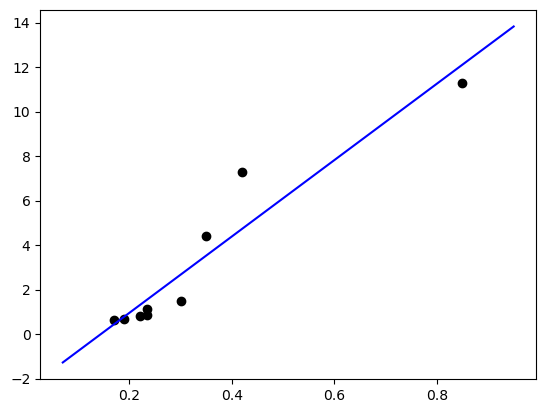

In [13]:
plotSLR(X, Y, b0, b1)

### Solve Linear Equation through *lineregress* function

scipy.stats package has a function linregress function that can do simple linear regression conveniently.

In [14]:
from scipy.stats import linregress

In [15]:
(b1, b0, r, p, stderr) = linregress(X,Y)
print("slope=",b1)
print("interception=", b0)
print("r=", r)

slope= 17.159368896513726
interception= -2.4759250488752143
r= 0.9541942798645503


## Multiple Linear Regression

### Read a multiple linear regression data set

mlr01.csv is a dataset of Thunder Basin antelope study. The data (X1, X2, X3, X4) are for each year:

* X1 = spring fawn count/100
* X2 = size of adult antelope population/100
* X3 = annual precipitation (inches)
* X4 = winter severity index (1=mild, 5=severe)

Dataset description can be found [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)

In [16]:
url = 'https://raw.githubusercontent.com/lei-qian/NDSAWS24/refs/heads/main/Notebooks/data/mlr01.csv'
df = pd.read_csv(url)
#df = pd.read_excel("data/mlr02.xls")
df.head()

,X1,X2,X3,X4
0,2.9,9.2,13.2,2
1,2.4,8.7,11.5,3
2,2.0,7.2,10.8,4
3,2.3,8.5,12.3,2
4,3.2,9.6,12.6,3


In [17]:
data=df.values
X=data[:, 1:]
Y=data[:,0]
n, m = X.shape
print(m,n)

3 8


In [18]:
#insert a column of constant 1  
X1 = np.hstack((np.ones((n,1)), X))
print(X1)

[[ 1.          9.19999981 13.19999981  2.        ]
 [ 1.          8.69999981 11.5         3.        ]
 [ 1.          7.19999981 10.80000019  4.        ]
 [ 1.          8.5        12.30000019  2.        ]
 [ 1.          9.6        12.60000038  3.        ]
 [ 1.          6.80000019 10.60000038  5.        ]
 [ 1.          9.69999981 14.10000038  1.        ]
 [ 1.          7.9000001  11.19999981  3.        ]]


In [19]:
b = np.linalg.inv(X1.T@X1)@X1.T@Y
print(b)

[-5.92201143  0.33821753  0.40150391  0.26294607]


In [20]:
Yhat = X1@b
E = Y-Yhat
sse = E.T@E
sst = Y.var()*n
r2 = 1-sse/sst

In [21]:
print("sse=",sse)
print("sst=",sst)
print("r2 =",r2)
print("r=",np.sqrt(r2))

sse= 0.0584938941505828
sst= 2.275000410900039
r2 = 0.9742884028194785
r= 0.98706048589713


Scikit Learng package has a linear_model that can perform multiple linear regression. 

In [22]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)
print("Coefficient = ", model.coef_)
print("Intercept = ", model.intercept_)
print("R square = ", model.score(X, Y))

Coefficient =  [0.33821753 0.40150391 0.26294607]
Intercept =  -5.92201143088417
R square =  0.9742884028194786


**Exercises** Use the same method to train linear regression models on slr02, mlr01. You have to use proper *sep*, *header*, *skiprows* etc to handle the data properly.

If there are more time, apply the model to slr03, slr04, mlr03, and mlr04.